### 강화학습 구조

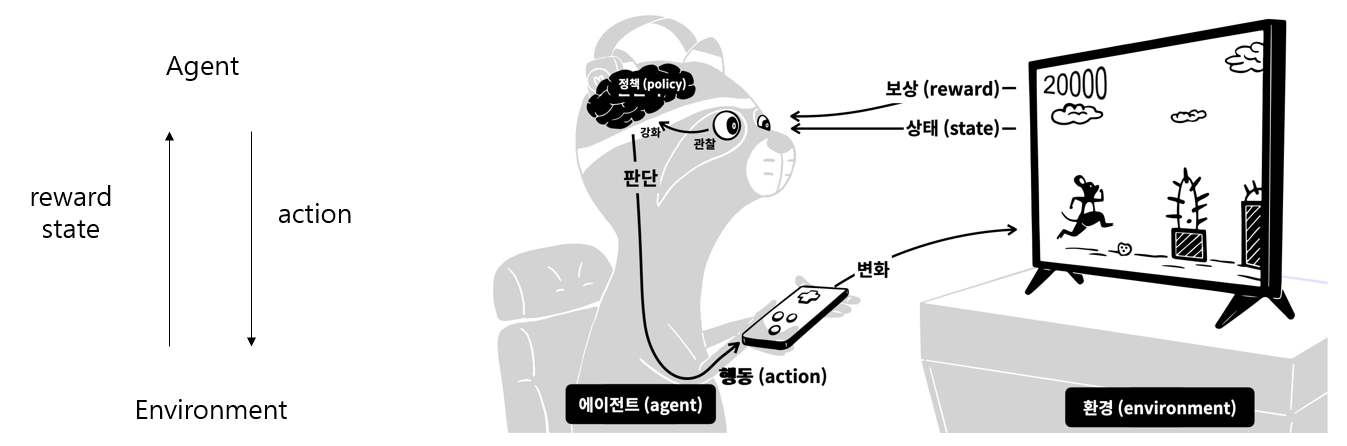

# 
### 강화학습 목적 :

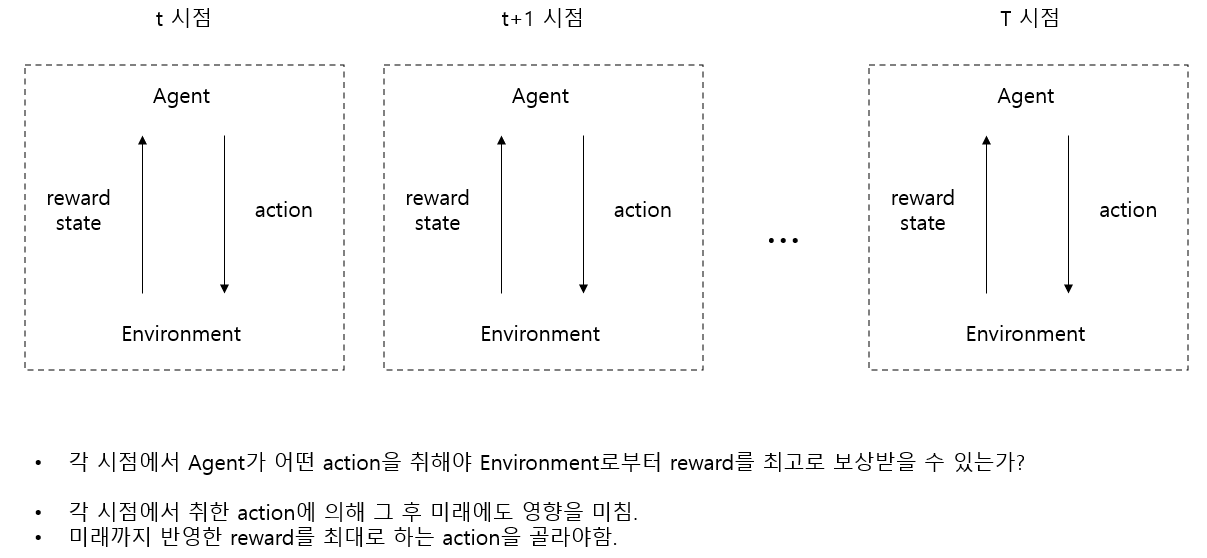

# 
### 일반적인 강화학습 환경 : 확률적

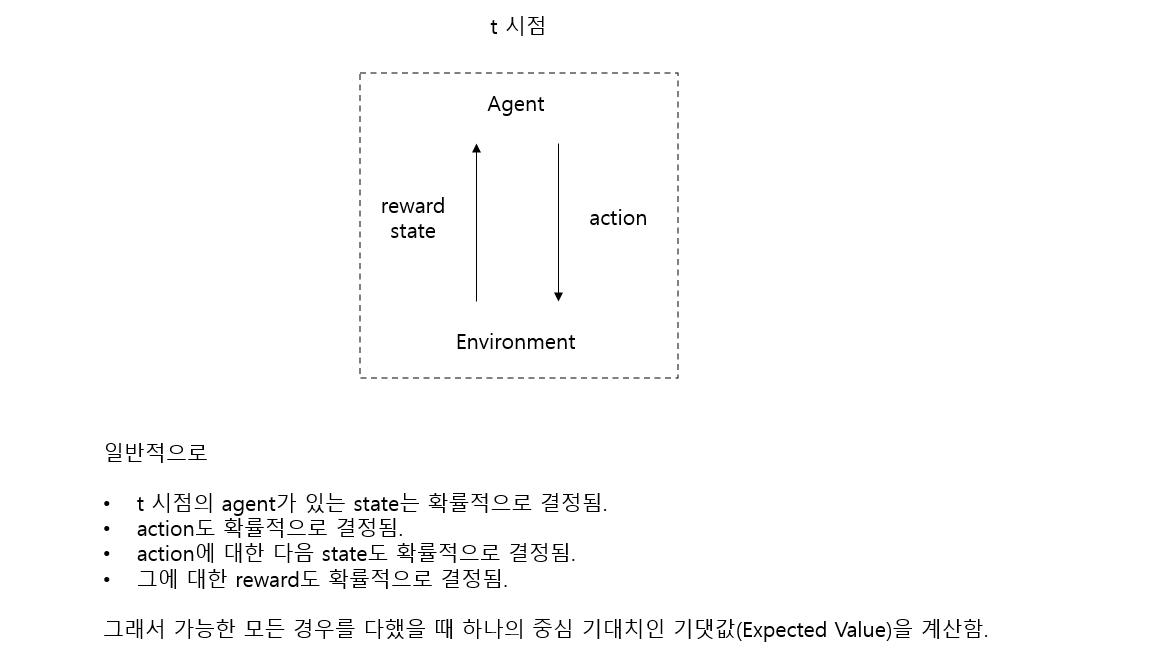

생각해보기 : 보상의 기대치만을 생각하는게 합당한가?
- 만약,
    1. 보상의 기대치가 10이고 분산이 100인 Agent의 전략과
    2. 보상의 기대치가 8이고 분산이 1인 Agent의 전략이 있다면 어떠한 것이 우수하다고 할 수 있는가?

# 
### 1.2 밴디트 문제

#### 1.2.1 밴디트 문제 소개
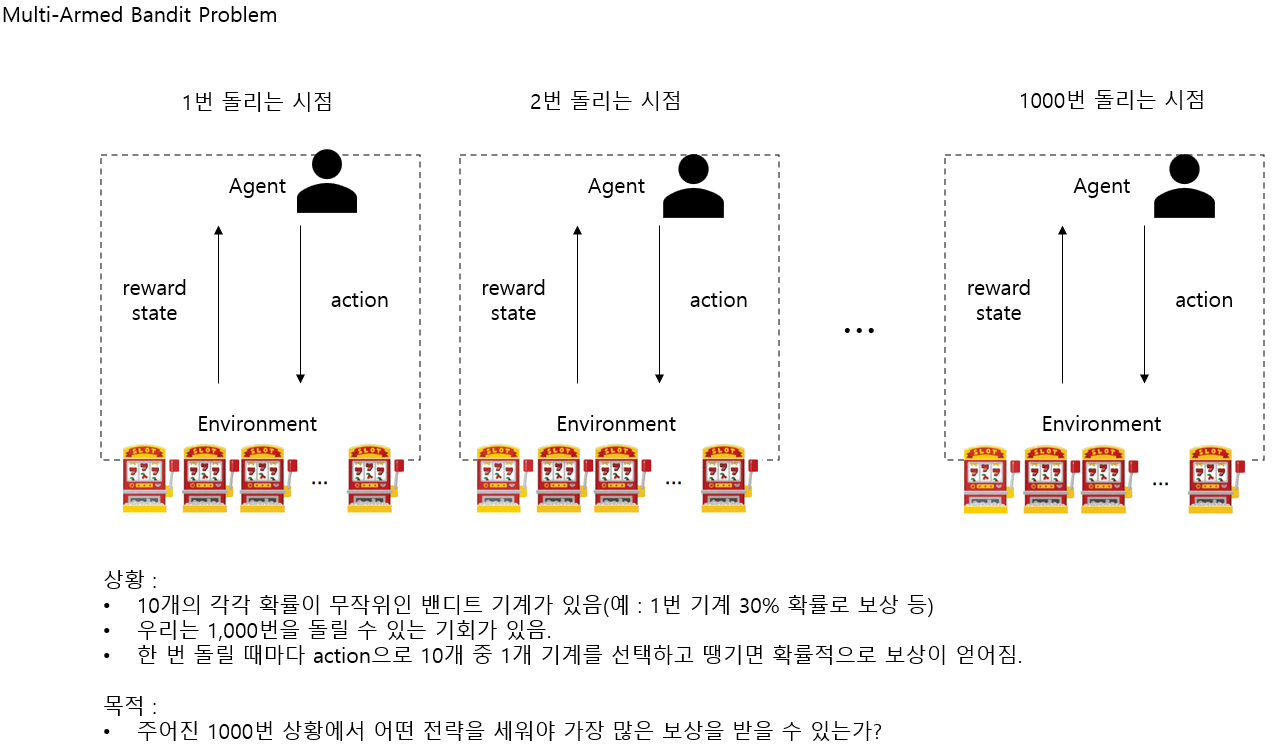

# 
#### 1.2.2 좋은 슬롯머신이란?
- 슬롯머신이 확률적으로 보상을 뱉으므로 무수히 많은 실행을 했을 때 결국에 어떤 슬롯머신이 보상이 높은가를 물어볼 수 있음.
- 이를 나타내는 개념이 "기댓값"임.

쉽게 이해하기 위해 2개의 슬롯머신이 있고 각각 보상이 0,1,5,10개의 코인이 각각에 대응하는 확률로 나온다고해보자.

In [6]:
import numpy as np

a_coin = np.array([0, 1, 5, 10])
a_prob = np.array([0.7, 0.15, 0.12, 0.03])
a_Exp = np.sum(a_coin * a_prob)
print("a 슬롯머신 기댓값 : ", a_Exp)


b_coin = np.array([0, 1, 5, 10])
b_prob = np.array([0.5, 0.4, 0.09, 0.01])
b_Exp = np.sum(b_coin * b_prob)
print("b 슬롯머신 기댓값 : ", b_Exp)

a 슬롯머신 기댓값 :  1.05
b 슬롯머신 기댓값 :  0.95


- 즉 무수히 많이 던져볼 수 있다면 A 슬롯머신에 몰빵하는 것이 좋은 전략임을 의미함.   


용어 정리 : 
- 밴디트 문제에서 보상의 기댓값을 "가치" Value 라고 함.
- 특히 행동의 결과로 얻는 보상의 기댓값을 "행동 가치" Action value 라고함.

하지만 현실적으로 무한번 던져볼 수가 없음. 그래서 던져보면서 좋은 전략을 취해봐야함.

#### 정리 :
    1. 무수히 많이 던져볼 수 있다면 A 슬롯머신에 올인이 가장 좋은 전략임.
    2. 즉 기댓값은 좋은 슬롯머신이 무엇인가를 정량적으로 나타낼 수 있는 수치라고 할 수 있음.

# 
### 1.3 밴디트 알고리즘 소개
#### 1.3.1 가치 추정 방법

현재 상황 : 
1. 모든 슬롯머신의 확률을 알고 있다면 기댓값을 통해 가장 좋은 슬롯머신 고를 수 있음.
2. 하지만 슬롯머신 확률을 모름.
3. 해보면서 추정해야함.

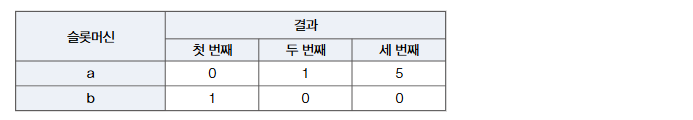
위와 같이 3번을 돌렸을 때 각 보상이 주어졌다고 해보자.
- 이를 기반으로 다음 슬롯머신을 어떤 것으로 고를 수 있는가?
- 다음 슬롯머신을 고를 기준으로 한 가지 방법인 표본평균을 계산해보자

In [7]:
a = np.array([0,1,5])
b = np.array([1,0,0])

print("a 보상 평균 : ", np.mean(a))
print("b 보상 평균 : ", np.mean(b))

a 보상 평균 :  2.0
b 보상 평균 :  0.3333333333333333


3회에 대한 보상의 표본평균을 보아 a 슬롯머신이 좋아보임. 그렇다면?
1. 그 뒤부터 a 슬롯머신만 선택하면 좋은 선택일까? -> 활용(Exploitation)
2. 아니면 좀 더 다양한 선택을 해보아야 할까? -> 탐색(Exploration)

- 일반적으로 실행 횟수가 많아지면 우리가 모르는 참인 기댓값에 가까워짐.
- 그러나 주어진 횟수는 1000회로 한정적이라는 것을 기억해야함.

표본평균을 Agent의 Action을 어떻게 할지의 기준으로 삼는다는 것은
1. sample 수가 적을 때는 불안정해보일 수 있으나
2. sample 수가 충분히 많으면 보상의 기댓값으로 수렴하므로 n이 커지는 경우 좋은 기준이라는 것임.

# 
#### 1.3.2 평균을 구하는 코드
- 그렇다면 표본평균을 Agent가 어떤 action 을 선택하게 하는지의 지표로 사용한다고 해보자.
- 이 장에서는 Agent의 action이 하나씩 늘어날 때마다 표본평균을 계산량이 적게 구하는 방법을 구현해볼 것임.

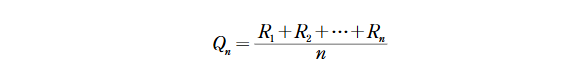

- $R_i$ 은 $i$ 번째 실제로 얻은 보상들이며 $Q_n$ 은 $n$번 수행했을 때 보상평균을 의미함.
- $Q_n$을 $n$번 행동했을 때의 행동 가치 추정치 라고함.

1개의 밴디트 머신에 대해 10번을 돌렸다고 가정해보고 매번 돌릴 때마다 보상평균을 출력해보자

In [10]:
np.random.seed(0) # 시드고정
rewards = []

for n in range(1,11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(n, "번째 보상평균 : ",Q)

1 번째 보상평균 :  0.5488135039273248
2 번째 보상평균 :  0.6320014351498722
3 번째 보상평균 :  0.6222554154571295
4 번째 보상평균 :  0.6029123573420713
5 번째 보상평균 :  0.567060845741438
6 번째 보상평균 :  0.5801997236289743
7 번째 보상평균 :  0.5598265075766483
8 번째 보상평균 :  0.6013198192273272
9 번째 보상평균 :  0.6415801460355164
10 번째 보상평균 :  0.6157662833145425


만약 1000번과 같이 횟수가 많아진다면 매 회마다 계속해서 n개에 대한 표본평균을 계산해야하므로 비효율적임.
- 이를 효율적으로 구현하기 위해 이전 단계에서 구한 표본평균을 재사용해서 계산량을 줄이는 테크닉을 사용함.

수식 유도 :
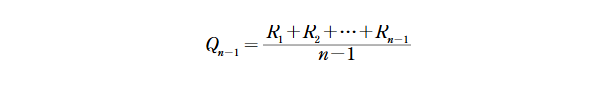
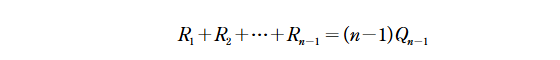
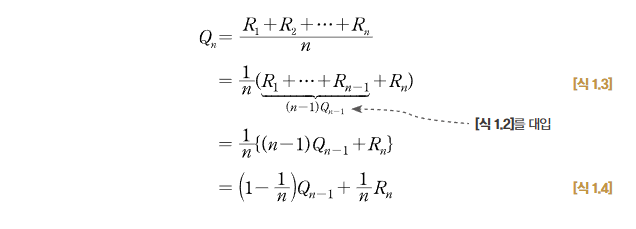
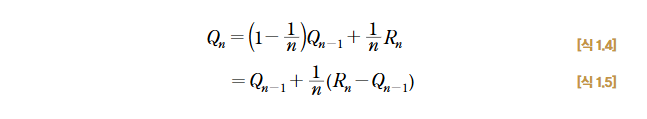
- 현재 $n$ 번째 보상평균 $Q_n$ 은 
    1. 전 단계에서 구한 $n-1$ 번째 보상평균 $Q_{n-1}$과
    2. 현재 보상 $R_n$ 으로 구성됨.   
    
즉 이전에 구해놓은 보상평균에 현재 보상을 위 식처럼 얹혀놓으면 현재까지의 보상평균 $Q_n$ 을 계산할 수 있다는 의미임.   
계속해서 매번마다 평균을 계산하지 않아도됨.

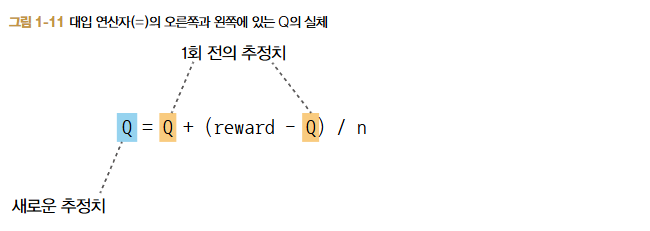

In [11]:
Q = 0

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(n, "번째 보상 평균 : ", Q)

1 번째 보상 평균 :  0.7917250380826646
2 번째 보상 평균 :  0.6603099789177845
3 번째 보상 평균 :  0.6295548396431672
4 번째 보상 평균 :  0.7035652893055406
5 번째 보상 평균 :  0.5770594430840099
6 번째 보상 평균 :  0.49540441918693173
7 번째 보상 평균 :  0.4275207017945595
8 번째 보상 평균 :  0.4781580947637318
9 번째 보상 평균 :  0.5114912787844116
10 번째 보상 평균 :  0.5473433657306523


#### 정리 : 
- 위 파트에서는 Agent가 action을 취할 기준으로 표본평균이 좋은 대안 이라는 것임.(n이 크다는 상황에서)
- 이를 매번마다 효율적으로 계산하기 위해 수식을 유도해봄

# 
#### 1.3.3 Agent의 정책
#### 목적 : Agent는 유한한 횟수에서 보상을 최대로 받아야함.   
그렇다면 Agent는 어떤 전략을 취해야 하는가?

1. 너무 적은 횟수에 특정한 머신을 선택해버리면 잘못된 선택을 할 수 있음.
2. 그렇다고 너무 많은 횟수에 머신을 선택하면 횟수가 얼마 남지 않음.
3. 적당한 선을 선택할 수 없는가?
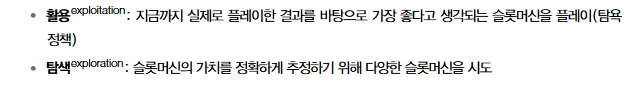

#### $\epsilon$ 탐용 정책 (epsilon greedy)
- 가장 간단히 매 회마다 작은 확률로 다른 것을 선택해보는 모험과 높은 확률로 기존의 선택에서 가장 좋은 보상을 줬던 것을 고르는 전략

# 
### 1.4 밴디트 알고리즘 구현
이번 장에서는 밴디트 문제 전체를 구현하고 Agent의 epsilon greedy 전략을 사용하였을 때 과연 좋은 결과를 얻어낼 수 있는지 구현해본다.

#### 1.4.1 슬롯머신 구현
10개의 임의로 확률이 부여된 슬롯머신 구현

In [12]:
class Bandit :
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)
        
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else :
            return 0

In [14]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

1
0
0


# 
#### 1.4.2 Agent 구현
Agent 는 action 기능이 있어야함.(그리고 action은 어떤 전략으로 선택하게 할지도)

#### 
Agent 구현에 앞서 
1. 10개 슬롯머신 구현과 
2. 1회 action마다 10개 중 1개 슬롯머신을 고르고
3. 보상이 얻어졌을 때 해당 슬롯머신에 대한 표본평균을 담은 리스트를 뽑는 모듈 설계

In [15]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
    reward = bandit.play(0) # 0번째 슬롯머신 플레이
    Q += (reward - Q) / n
    print(n, "회 수행한 0번 슬롯머신 보상 평균 : ", Q)

1 회 수행한 0번 슬롯머신 보상 평균 :  0.0
2 회 수행한 0번 슬롯머신 보상 평균 :  0.0
3 회 수행한 0번 슬롯머신 보상 평균 :  0.0
4 회 수행한 0번 슬롯머신 보상 평균 :  0.0
5 회 수행한 0번 슬롯머신 보상 평균 :  0.2
6 회 수행한 0번 슬롯머신 보상 평균 :  0.33333333333333337
7 회 수행한 0번 슬롯머신 보상 평균 :  0.28571428571428575
8 회 수행한 0번 슬롯머신 보상 평균 :  0.375
9 회 수행한 0번 슬롯머신 보상 평균 :  0.4444444444444444
10 회 수행한 0번 슬롯머신 보상 평균 :  0.39999999999999997


In [22]:
bandit = Bandit()
Qs = np.zeros(10) # 각 슬롯머신의 가치 추정치
ns = np.zeros(10) # 각 슬롯머신의 플레이 횟수

for n in range(10):
    action = np.random.randint(0, 10) # 무작위 행동(10개 중 임의의 슬롯머신 선택)
    reward = bandit.play(action)
    
    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(n, "회 수행했을 때 슬로멋신들의 보상평균 : ",Qs)

0 회 수행했을 때 슬로멋신들의 보상평균 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 회 수행했을 때 슬로멋신들의 보상평균 :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2 회 수행했을 때 슬로멋신들의 보상평균 :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3 회 수행했을 때 슬로멋신들의 보상평균 :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
4 회 수행했을 때 슬로멋신들의 보상평균 :  [0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
5 회 수행했을 때 슬로멋신들의 보상평균 :  [0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
6 회 수행했을 때 슬로멋신들의 보상평균 :  [0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
7 회 수행했을 때 슬로멋신들의 보상평균 :  [1.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
8 회 수행했을 때 슬로멋신들의 보상평균 :  [1.  0.  0.5 1.  0.  0.  0.  0.  0.  0. ]
9 회 수행했을 때 슬로멋신들의 보상평균 :  [1.  0.  0.5 1.  0.  0.  0.  0.  0.  0.5]


#### Agent 구현
epsilon greedy 전략에 따라 행동하는 Agent 구현

In [23]:
class Agent :
    def __init__(self, epsilon, action_size=10): # action size는 10개 슬롯머신 선택
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
        
    def update(self, action, reward): # 슬롯머신의 가치 추정
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
        
    def get_action(self): # 행동 정책 epsilon greedy 전략 사용
        if np.random.rand() < self.epsilon :
            return np.random.randint(0, len(self.Qs)) # 무작위 action
        return np.argmax(self.Qs) # 아니라면 보상평균이 컸던 애 선택

# 
#### 1.4.3 실행해보기
이제 1000번을 돌려볼것임. 전략은 탐욕정책($\epsilon=0.1$ ), 보상이 얼마나 얻어지는지 체크해보자

896


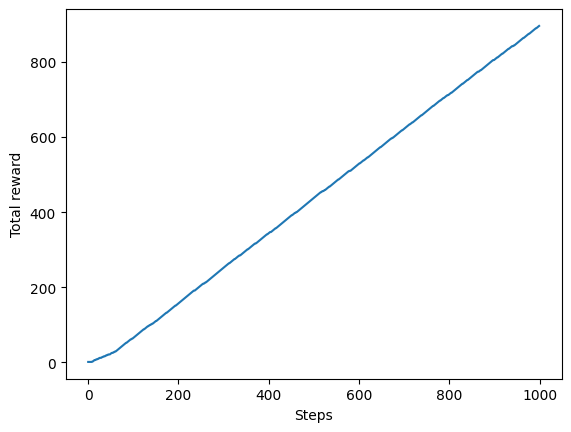

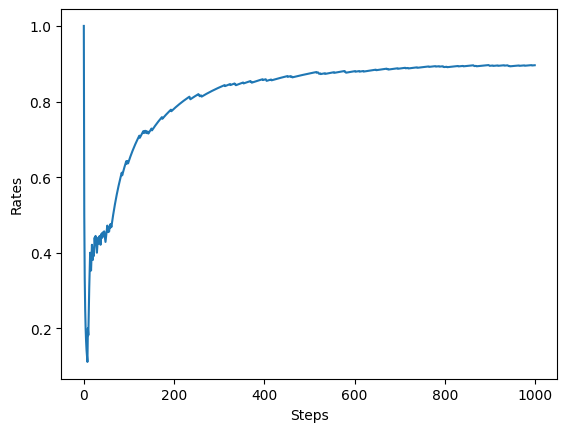

10개 슬롯머신 보상확률 : 
 [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
학습이 끝난 후 Agent의 선택 전략 : 
 [0.5        0.75       0.41666667 0.55555556 0.5        0.4
 0.5        0.9375     0.95976331 0.35714286]


In [30]:
import matplotlib.pyplot as plt
np.random.seed(0)

steps = 1000
epsilon = 0.1

bandit = Bandit() # 환경 : 슬롯머신 10개 선언
agent = Agent(epsilon)
total_reward = 0
total_rewards = [] # 보상 합
rates = [] # 승률

for step in range(steps):
    action = agent.get_action() # 1. Action 슬롯머신 선택
    reward = bandit.play(action) # 2. 슬롯머신 돌려서 보상 얻기
    agent.update(action, reward) # 3. agent의 행동 전략 업데이트
    total_reward += reward
    
    total_rewards.append(total_reward) # 현재까지의 보상 합을 저장
    rates.append(total_reward / (step + 1)) # 현재까지 승률 저장
print(total_reward)

# 단계별 보상
plt.ylabel("Total reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

# 단계별 승률
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()

print("10개 슬롯머신 보상확률 : \n",bandit.rates)
print("학습이 끝난 후 Agent의 선택 전략 : \n", agent.Qs)

# 
#### 1.4.4 이 전략이 좋은 것인가?
입실론 그리디 전략을 사용하여 구현한 밴디트 알고리즘은 좋은 전략인가?   
    - 상황은 10개의 슬롯머신이 무작위로 확률이 부여된 경우임.   
    - 이러한 경우에 항상 입실론 그리디 전략은 좋은 것일까?

1. 슬롯머신의 확률이 다른 경우에 10번을 취해보기

Run 1 Total Reward: 944
Run 2 Total Reward: 793
Run 3 Total Reward: 936
Run 4 Total Reward: 872
Run 5 Total Reward: 943
Run 6 Total Reward: 627
Run 7 Total Reward: 908
Run 8 Total Reward: 941
Run 9 Total Reward: 852
Run 10 Total Reward: 899


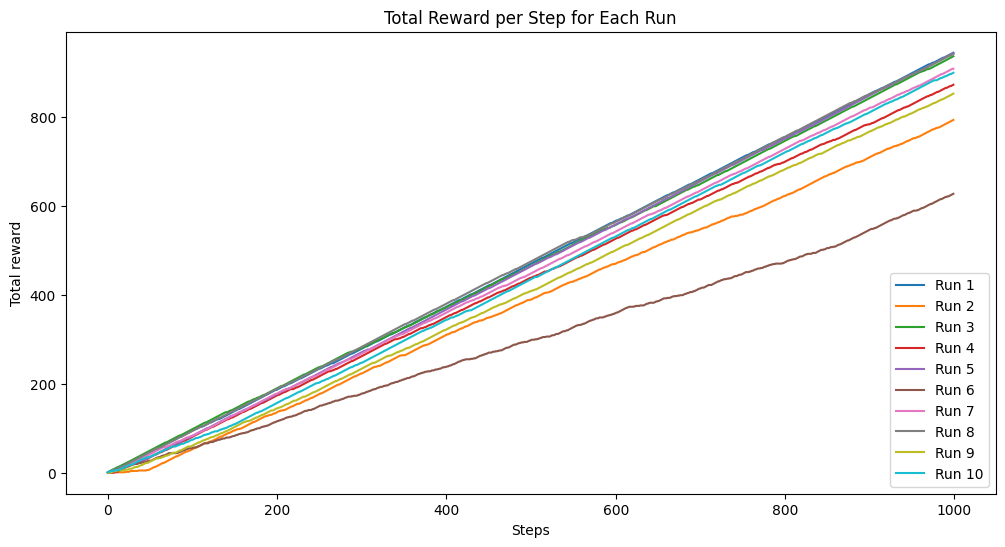

<Figure size 640x480 with 0 Axes>

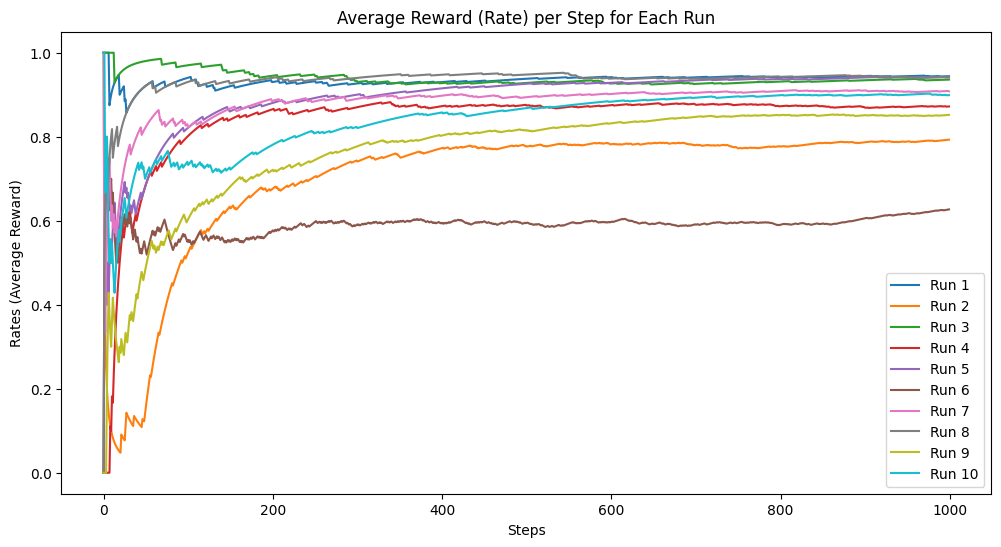

In [32]:
steps = 1000
epsilon = 0.1
num_runs = 10 # 요청된 10번의 실행

all_runs_total_rewards = [] # 모든 실행의 단계별 총 보상을 저장할 리스트
all_runs_rates = [] # 모든 실행의 단계별 승률을 저장할 리스트

for i in range(num_runs):
    bandit = Bandit() # 각 실행마다 새로운 Bandit 환경 생성
    agent = Agent(epsilon) # 각 실행마다 새로운 Agent 생성
    
    total_reward_for_current_run = 0 # 현재 실행의 총 보상
    current_run_total_rewards_over_steps = [] # 현재 실행의 단계별 누적 보상
    current_run_rates_over_steps = [] # 현재 실행의 단계별 승률

    for step in range(steps):
        action = agent.get_action() # 1. 행동(슬롯머신) 선택
        reward = bandit.play(action) # 2. 선택한 슬롯머신을 실행하여 보상 얻기
        agent.update(action, reward) # 3. 에이전트의 행동 전략 업데이트
        total_reward_for_current_run += reward

        current_run_total_rewards_over_steps.append(total_reward_for_current_run) # 현재까지의 보상 합 저장
        current_run_rates_over_steps.append(total_reward_for_current_run / (step + 1)) # 현재까지의 승률 저장
    
    # 현재 실행의 총 보상과 실행 번호 출력
    print(f"Run {i+1} Total Reward: {total_reward_for_current_run}")

    all_runs_total_rewards.append(current_run_total_rewards_over_steps)
    all_runs_rates.append(current_run_rates_over_steps)

# 그래프 그리기
# 1. 단계별 총 보상 (10번 실행 각각에 대한 선 그래프)
plt.figure(figsize=(12, 6)) 
plt.ylabel("Total reward")
plt.xlabel("Steps")
plt.title("Total Reward per Step for Each Run")
for i in range(num_runs):
    plt.plot(all_runs_total_rewards[i], label=f"Run {i+1}")
plt.legend(loc='lower right') # 범례 추가 (오른쪽 아래)
plt.show()
plt.clf() # 현재 Figure를 초기화

# 2. 단계별 승률 (10번 실행 각각에 대한 선 그래프)
plt.figure(figsize=(12, 6)) 
plt.ylabel("Rates (Average Reward)")
plt.xlabel("Steps")
plt.title("Average Reward (Rate) per Step for Each Run")
for i in range(num_runs):
    plt.plot(all_runs_rates[i], label=f"Run {i+1}")
plt.legend(loc='lower right') # 범례 추가 (오른쪽 아래)
plt.show()

#### 2. 200번으로 늘려서 보기

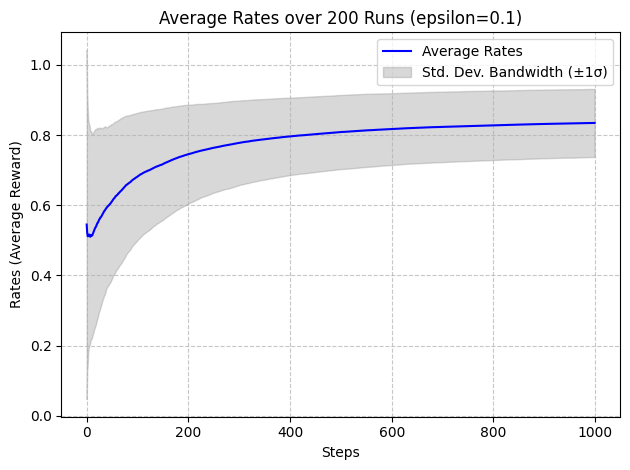

In [34]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000) 배열

for run in range(runs): # 200번 실험
    bandit = Bandit() # 환경 : 슬롯머신 10개 선언
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = [] # 보상 합
    rates = [] # 승률

    for step in range(steps):
        action = agent.get_action() # 1. Action 슬롯머신 선택
        reward = bandit.play(action) # 2. 슬롯머신 돌려서 보상 얻기
        agent.update(action, reward) # 3. agent의 행동 전략 업데이트
        total_reward += reward

        total_rewards.append(total_reward) # 현재까지의 보상 합을 저장
        rates.append(total_reward / (step + 1)) # 현재까지 승률 저장
    all_rates[run] = rates # 1. 보상 결과 기록

avg_rates = np.average(all_rates, axis=0) # 각 단계 평균 저장
std_rates = np.std(all_rates, axis=0) # 각 단계 승률의 표준편차 저장

# 단계별 승률 (200번 실험 후 평균 및 표준편차)
plt.ylabel("Rates (Average Reward)")
plt.xlabel("Steps")
plt.title(f"Average Rates over {runs} Runs (epsilon={epsilon})")

# 평균 승률 선 그리기
plt.plot(avg_rates, label="Average Rates", color='blue')

# 표준편차 음영 영역 그리기
# x_values는 0부터 steps-1 까지
x_values = np.arange(steps)
plt.fill_between(x_values, avg_rates - std_rates, avg_rates + std_rates, 
                 color='gray', alpha=0.3, label="Std. Dev. Bandwidth (±1σ)")

plt.legend() # 범례 표시
plt.grid(True, linestyle='--', alpha=0.7) # 그리드 추가
plt.tight_layout() # 레이아웃 최적화

plt.show()

#### 결과 해석 : 
1. Step에 따른 승률 평균(200회에 대한)이 80%를 넘음.
2. 이는 슬롯머신이 0~100% 확률이 임의로 부여되더라도 입실론 그리디 전략을 통해 보상을 받는 확률이 80% 이상이라는 것을 의미함.

# 
#### 3. 다양한 epsilon 값 부여해보기(어떤 epsilon 값이 좋은가?)

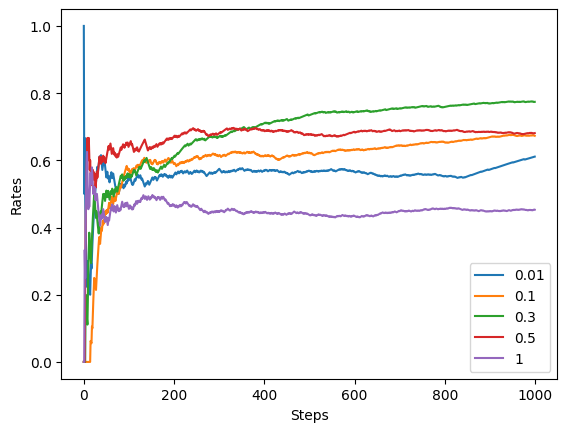

In [36]:
import matplotlib.pyplot as plt
np.random.seed(0)

steps = 1000
epsilon_list = [0.01, 0.1, 0.3, 0.5, 1]

for e in epsilon_list:
    bandit = Bandit() # 환경 : 슬롯머신 10개 선언
    agent = Agent(e)
    total_reward = 0
    total_rewards = [] # 보상 합
    rates = [] # 승률

    for step in range(steps):
        action = agent.get_action() # 1. Action 슬롯머신 선택
        reward = bandit.play(action) # 2. 슬롯머신 돌려서 보상 얻기
        agent.update(action, reward) # 3. agent의 행동 전략 업데이트
        total_reward += reward

        total_rewards.append(total_reward) # 현재까지의 보상 합을 저장
        rates.append(total_reward / (step + 1)) # 현재까지 승률 저장
    plt.plot(rates, label="{}".format(e))

# 단계별 승률
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.legend()
plt.show()

보라색은 완전히 랜덤하게만 선택하는 전략으로 가장 하위권을 차지함.

# 
### 1.5 비정상 문제
지금까지 풀어본 멀티암 밴디트는 모든 시점에서 각 슬롯머신의 확률이 고정적인 경우였음.
- 이러한 문제를 정상 문제(Stationary problem) 이라 함.

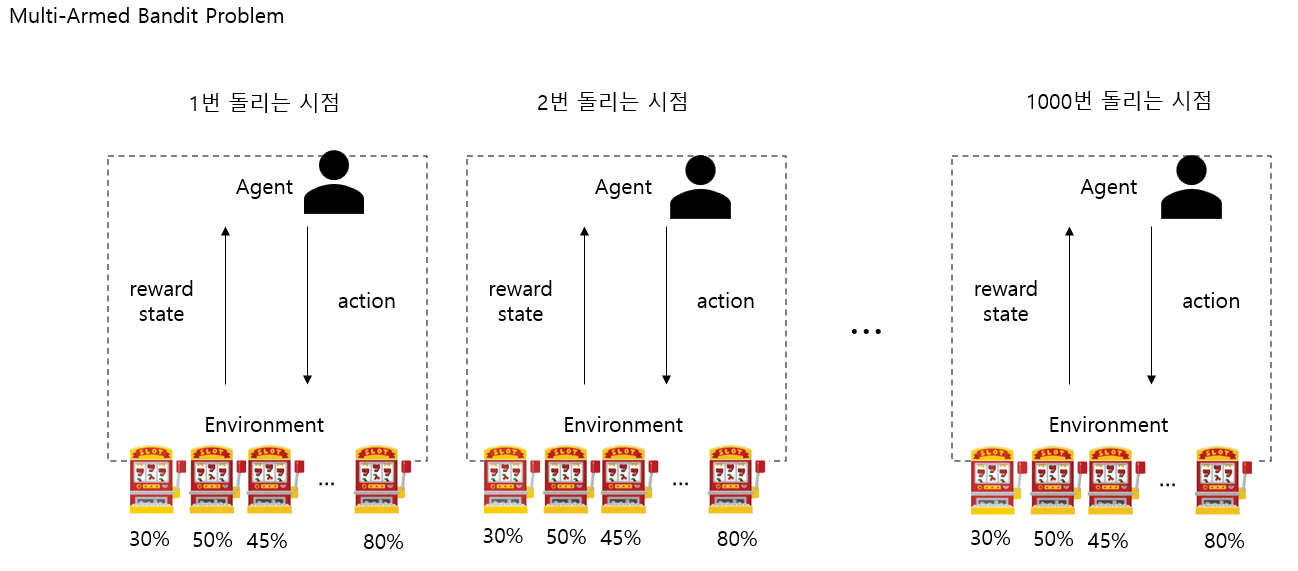

#### 
시점마다 확률이 변하지 않는 밴디트 클래스

In [40]:
class Bandit :
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms) # 한 번 설정하면 변하지 않음
        
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else :
            return 0

In [42]:
bandit = Bandit()
for i in range(5):
    bandit.play(0)
    print(bandit.rates)

[0.99628677 0.67126693 0.38258423 0.52304736 0.97053395 0.71919673
 0.79361175 0.35238735 0.25857115 0.68672207]
[0.99628677 0.67126693 0.38258423 0.52304736 0.97053395 0.71919673
 0.79361175 0.35238735 0.25857115 0.68672207]
[0.99628677 0.67126693 0.38258423 0.52304736 0.97053395 0.71919673
 0.79361175 0.35238735 0.25857115 0.68672207]
[0.99628677 0.67126693 0.38258423 0.52304736 0.97053395 0.71919673
 0.79361175 0.35238735 0.25857115 0.68672207]
[0.99628677 0.67126693 0.38258423 0.52304736 0.97053395 0.71919673
 0.79361175 0.35238735 0.25857115 0.68672207]


그런데 시점마다 약간씩 확률이 변하는 슬롯머신인 경우

In [45]:
class NonStatBandit :
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms) # 한 번 설정하면 변하지 않음
        self.arms = arms
        
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) # 노이즈 추가
        if rate > np.random.rand():
            return 1
        else :
            return 0

In [48]:
bandit = NonStatBandit()
for i in range(5):
    bandit.play(0)
    print(bandit.rates)

[ 0.74858439  0.18236804  0.69964156  0.58507499  0.4568854  -0.07545768
  0.79904213  0.22682319  0.50227285  0.80834757]
[ 0.8046148   0.3343933   0.78557088  0.50481214  0.36641309 -0.02670182
  0.75973787  0.22830522  0.64943385  0.76795486]
[ 0.96177371  0.36479643  0.69350888  0.56049551  0.42078157 -0.08765353
  0.80090768  0.20368788  0.68853258  0.86755398]
[ 0.94031351  0.30901712  0.65989263  0.62980374  0.3838299  -0.27281241
  0.82426054  0.18418523  0.6463419   0.89994433]
[ 0.90668664  0.2044539   0.53337505  0.71083648  0.22482555 -0.1675769
  0.7330222   0.27422911  0.67610813  0.94365673]


위와 같이 보상의 확률분포가 변하도록 설정된 문제를 비정상 문제(Non stationary problem) 이라 함

#### 
이렇게 매 시점마다 확률이 변하는 상태에서 Agent의 전략은 여전히 보상의 표본평균을 사용하는 것이 바람직할까?

1. 보상의 표본평균 : (확률이 변하는 상황에도 불구하고 이전 보상 표본평균을 기준으로 전략을 선택할 것임)
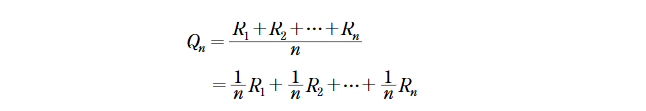
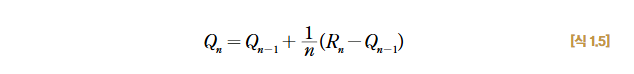
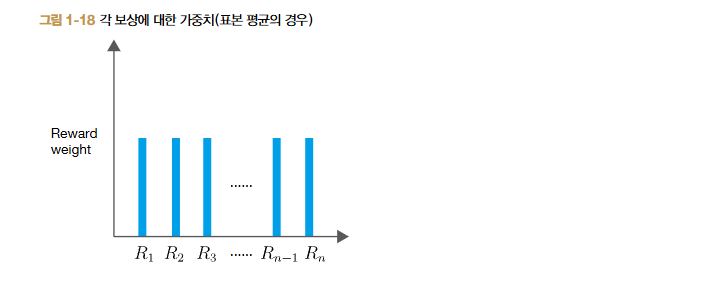

2. 지수 이동 평균(exponential moving average) : (현재 시점의 보상의 가중치를 크게 두는 방법, 시간이 지날수록 과거 시점의 보상의 가중치는 기하급수적으로 줄어듦, 즉 영향을 받지 않도록 설계하였다는 의미임)
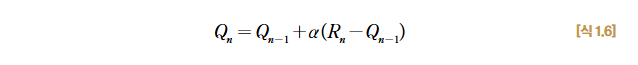
$0<\alpha<1$
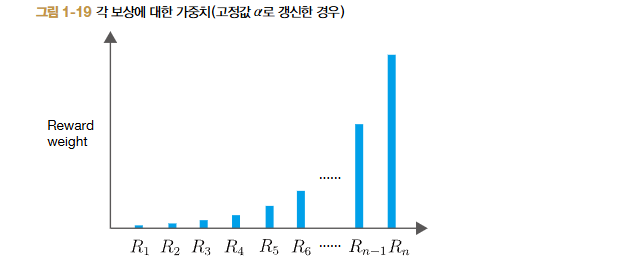
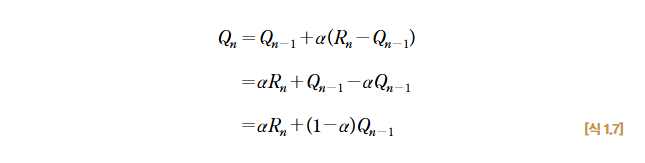
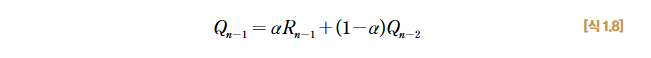
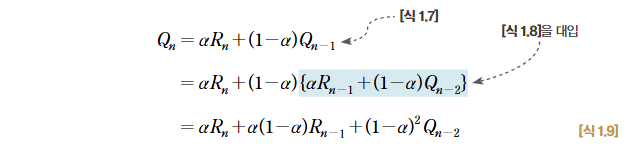
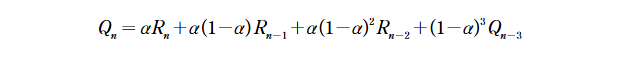
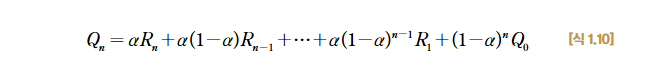
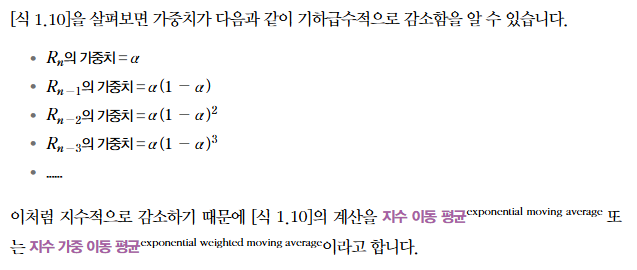

In [50]:
alpha = 0.9
for i in range(1,11):
    print("{}th 가중치 : {}".format(i, alpha))
    alpha = alpha**2

1th 가중치 : 0.9
2th 가중치 : 0.81
3th 가중치 : 0.6561000000000001
4th 가중치 : 0.43046721000000016
5th 가중치 : 0.18530201888518424
6th 가중치 : 0.03433683820292518
7th 가중치 : 0.001179018457773862
8th 가중치 : 1.390084523771456e-06
9th 가중치 : 1.9323349832289153e-12
10th 가중치 : 3.733918487410292e-24


즉 $\alpha$ 값이 도입되는 이유 중 하나를 설명하는 것   

    - 시점마다 확률이 변하므로 현재 시점이 가장 중요하고 과거 시점일수록 중요도가 현저히 떨어지게 설계함

# 
#### 1.5.2 비정상 문제 풀기
이제 확률이 시점마다 변하는 비정상 밴디트에 대해 지수이동평균 전략을 사용한 알고리즘을 써보고, 이전 표본평균과 비교해보자

1. alpha값을 가지는 agent 설계

In [54]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha # 고정 값 alpha
        
    def update(self, action, reward):
        # alpha로 갱신
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
    
    def get_action(self):
        if np.random.rand() < self.epsilon :
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

2. 두 Agent 전략 비교 (각각 200번에 대한 평균과 표준편차 반영)

In [55]:
class Agent :
    def __init__(self, epsilon, action_size=10): # action size는 10개 슬롯머신 선택
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
        
    def update(self, action, reward): # 슬롯머신의 가치 추정
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
        
    def get_action(self): # 행동 정책 epsilon greedy 전략 사용
        if np.random.rand() < self.epsilon :
            return np.random.randint(0, len(self.Qs)) # 무작위 action
        return np.argmax(self.Qs) # 아니라면 보상평균이 컸던 애 선택

표본 평균 Agent 시뮬레이션 중...
  진행: 20/200 실행 완료
  진행: 40/200 실행 완료
  진행: 60/200 실행 완료
  진행: 80/200 실행 완료
  진행: 100/200 실행 완료
  진행: 120/200 실행 완료
  진행: 140/200 실행 완료
  진행: 160/200 실행 완료
  진행: 180/200 실행 완료
  진행: 200/200 실행 완료

AlphaAgent 시뮬레이션 중...
  진행: 20/200 실행 완료
  진행: 40/200 실행 완료
  진행: 60/200 실행 완료
  진행: 80/200 실행 완료
  진행: 100/200 실행 완료
  진행: 120/200 실행 완료
  진행: 140/200 실행 완료
  진행: 160/200 실행 완료
  진행: 180/200 실행 완료
  진행: 200/200 실행 완료


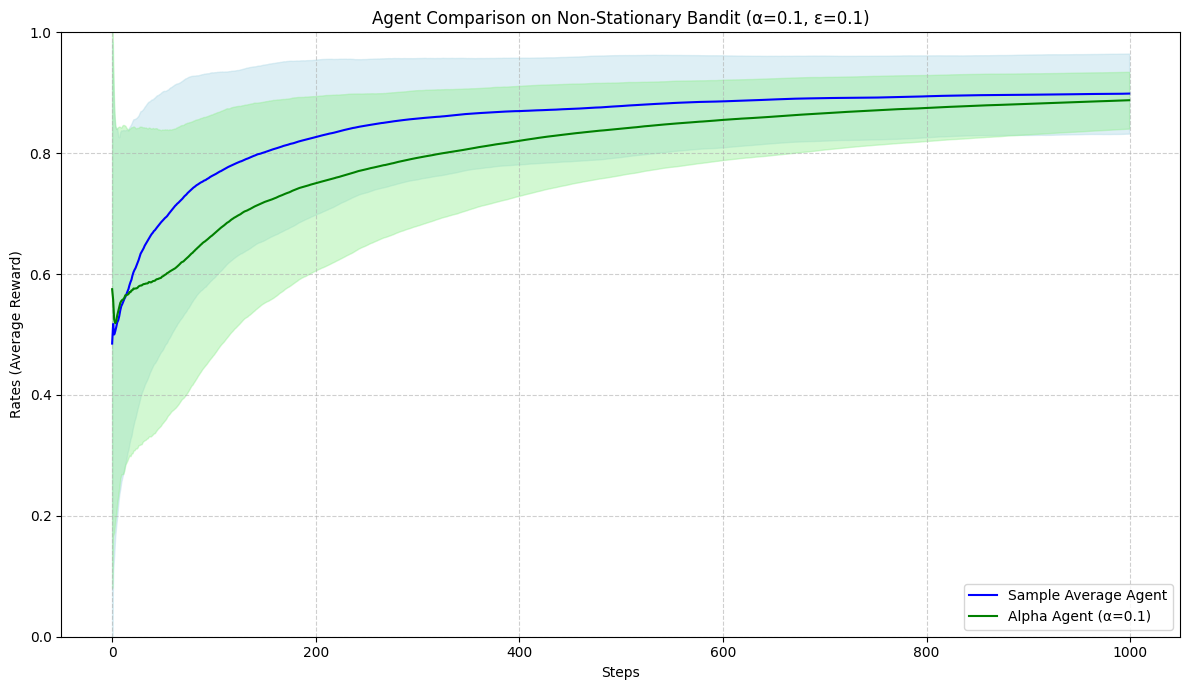

In [58]:
runs = 200
steps = 1000
epsilon = 0.1
alpha_for_alpha_agent = 0.1 # AlphaAgent를 위한 alpha 값
num_actions = 10 # 슬롯머신 팔의 개수

# --- 1. 표본 평균 Agent 시뮬레이션 ---
all_rates_sample_avg_agent = np.zeros((runs, steps))
print("표본 평균 Agent 시뮬레이션 중...")
for r_idx in range(runs):
    # 각 run마다 새로운 Bandit 환경과 Agent 생성
    bandit = NonStatBandit(arms=num_actions)
    agent = Agent(epsilon, action_size=num_actions)
    
    total_reward_for_current_run = 0
    current_run_step_rates = []
    for s_idx in range(steps):
        action = agent.get_action()
        reward = bandit.play(action) # Bandit의 내부 확률이 여기서 변동됨
        agent.update(action, reward)
        total_reward_for_current_run += reward
        current_run_step_rates.append(total_reward_for_current_run / (s_idx + 1))
    all_rates_sample_avg_agent[r_idx] = current_run_step_rates
    if (r_idx + 1) % (runs // 10) == 0: # 진행 상황 표시
        print(f"  진행: {r_idx + 1}/{runs} 실행 완료")

# --- 2. AlphaAgent 시뮬레이션 ---
all_rates_alpha_agent = np.zeros((runs, steps))
print("\nAlphaAgent 시뮬레이션 중...")
for r_idx in range(runs):
    # 각 run마다 새로운 Bandit 환경과 Agent 생성
    bandit = NonStatBandit(arms=num_actions)
    agent = AlphaAgent(epsilon, alpha_for_alpha_agent, actions=num_actions)
    
    total_reward_for_current_run = 0
    current_run_step_rates = []
    for s_idx in range(steps):
        action = agent.get_action()
        reward = bandit.play(action) # Bandit의 내부 확률이 여기서 변동됨
        agent.update(action, reward)
        total_reward_for_current_run += reward
        current_run_step_rates.append(total_reward_for_current_run / (s_idx + 1))
    all_rates_alpha_agent[r_idx] = current_run_step_rates
    if (r_idx + 1) % (runs // 10) == 0: # 진행 상황 표시
        print(f"  진행: {r_idx + 1}/{runs} 실행 완료")

# --- 통계 계산 ---
avg_rates_sample_avg = np.average(all_rates_sample_avg_agent, axis=0)
std_rates_sample_avg = np.std(all_rates_sample_avg_agent, axis=0)

avg_rates_alpha = np.average(all_rates_alpha_agent, axis=0)
std_rates_alpha = np.std(all_rates_alpha_agent, axis=0)

# --- 그래프 그리기 ---
plt.figure(figsize=(12, 7))
plt.ylabel("Rates (Average Reward)")
plt.xlabel("Steps")
plt.title(f"Agent Comparison on Non-Stationary Bandit (α={alpha_for_alpha_agent}, ε={epsilon})")

x_values = np.arange(steps)

# 표본 평균 Agent 플롯
plt.plot(avg_rates_sample_avg, label="Sample Average Agent", color="blue", linewidth=1.5)
plt.fill_between(x_values, avg_rates_sample_avg - std_rates_sample_avg,
                 avg_rates_sample_avg + std_rates_sample_avg,
                 color="lightblue", alpha=0.4)

# AlphaAgent 플롯
plt.plot(avg_rates_alpha, label=f"Alpha Agent (α={alpha_for_alpha_agent})", color="green", linewidth=1.5)
plt.fill_between(x_values, avg_rates_alpha - std_rates_alpha,
                 avg_rates_alpha + std_rates_alpha,
                 color="lightgreen", alpha=0.4)

plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

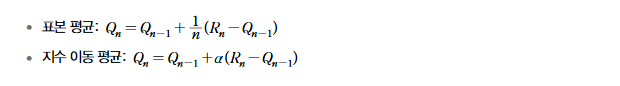

## 정리
#### 1. 강화학습 구조와 목적
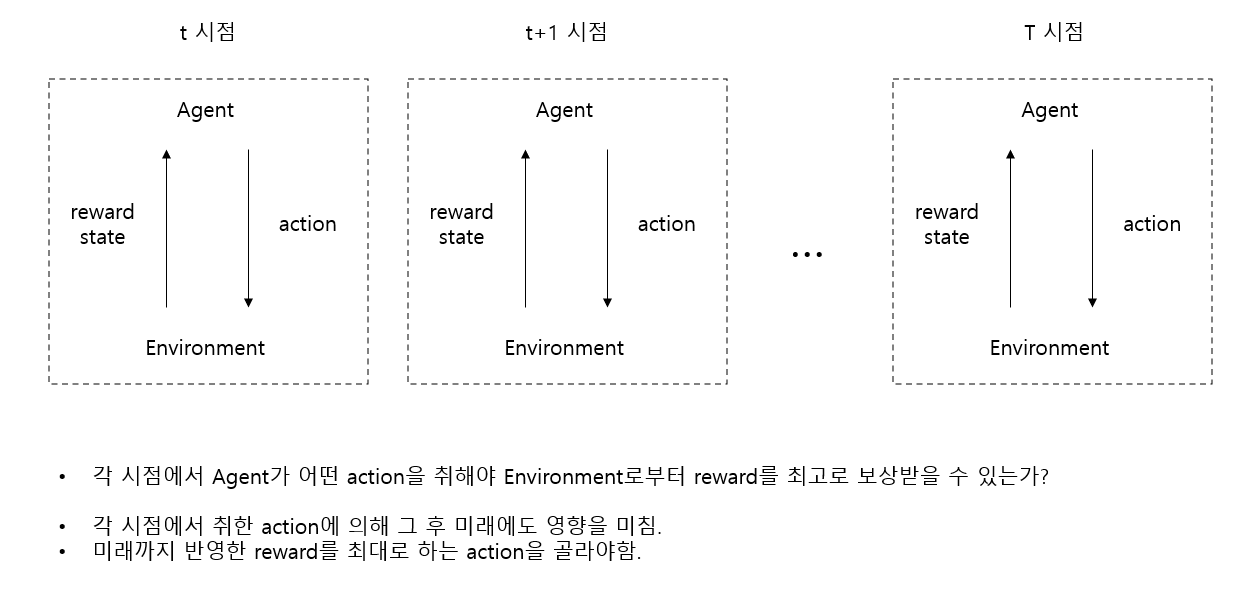
#### 
#### 2. 멀티암 밴디트 문제 구현을 통한 Agent와 Environment 구체적으로 구현하는 방법 이해
#### 3. Agent의 전략으로 epsilon greedy 전략을 알아봄.
#### 4. 그러한 전략 선택 기준으로 보상의 표본평균과 지수 이동 평균을 알아봄.
#### 5. 용어
- 가치(value) : reward의 기댓값
- 행동 가치(action value) : action의 결과로 얻는 reward의 기댓값